# Titanic Exercise

to install seaborn :
```bash
conda install -c conda-forge seaborn
````


In [49]:
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [50]:
embarked_labels = {
  "C": "Cherbourg",
  "Q": "Queenstown",
  "S": "Southampton",
}

In [51]:
# 1. Load the dataset
titanic = load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [52]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
# 2. Data cleaning
# 2.1. Check the missing values
print(titanic.shape)
print(titanic.isnull().sum())

# 2.2. Replace the missing values in age with the mean
# titanic["age"].fillna(titanic["age"].mean(), inplace=True)

# 2.3 Drop the empty embarked rows
titanic.dropna(subset=["embarked"], inplace=True)

# 2.4 remove the deck column

(891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [54]:
# 3 Analyse data

# 3.1 compute the global survival rate
print(titanic.survived.describe())
survival_rate = titanic.survived.value_counts().loc[1] / len(titanic) * 100
survival_rate = titanic.survived.mean() * 100
print(f"Overall survival rate: {survival_rate}")

count    889.000000
mean       0.382452
std        0.486260
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64
Overall survival rate: 38.24521934758155


In [55]:
# 3.2 Analyser la répartition des passagers par classe (Pclass) et par port d'embarquement (Embarked).
rce = titanic.groupby("embarked").pclass.value_counts().unstack()

# rce = titanic.groupby(["embarked", "pclass"]).agg(survived_sum=("survived", "sum"), total_count=("survived", "count"))
# rce["ratio"] = rce["survived_sum"] / rce["total_count"]

rce = titanic.groupby(["embarked", "pclass"]).size().reset_index(name="count")
# rce['Percentage'] = rce["count"] / rce.groupby('pclass')["count"].transform('sum') * 100
rce

,embarked,pclass,count
0,C,1,85
1,C,2,17
2,C,3,66
3,Q,1,2
4,Q,2,3
5,Q,3,72
6,S,1,127
7,S,2,164
8,S,3,353


In [56]:
# Calculer la proportion de passagers masculins et féminins.
total = len(titanic)
proportion = len(titanic[titanic.sex == "female"]) / total * 100
proportion = titanic[titanic.sex == "female"].sex.count() / total * 100
gender_proportion = pd.Series([proportion, 100-proportion], index=["female", "male"], name="Gender proportion")

gender_proportion = titanic.sex.value_counts() / len(titanic) * 100
gender_proportion = titanic.sex.value_counts(normalize=True) * 100
gender_proportion

sex
male      64.904387
female    35.095613
Name: proportion, dtype: float64

In [62]:
# Identifier la distribution d'âge des passagers et trouver les catégories d'âge les plus représentées.
age_distribution = titanic.age.value_counts().sort_index()
most_categories = age_distribution.idxmax()
print(f"age distribution: {age_distribution}")
print(f"most represented category: {most_categories}")

age distribution: age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64
most represented category: 24.0


In [66]:
# Create age categories
bins = [0, 18, 30, 50, titanic["age"].max()]  # Define your age bins as needed
labels = ['0-17', '18-29', '30-49', '50+']  # Label each bin

titanic["age_category"] = pd.cut(titanic["age"], bins=bins, labels=labels, right=False)
titanic["age_category"].value_counts()

age_category
18-29    271
30-49    255
0-17     113
50+       72
Name: count, dtype: int64

In [58]:
# 4 Alives analyse
# 4.1 Survival based on ticket class (Pclass)

# survival_class = titanic.groupby(["pclass", "survived"]).size().reset_index(name="count")
# survival_class["percentage"] = survival_class["count"] / survival_class.groupby(["pclass"])["count"].transform("sum") * 100

survival_class = titanic.groupby(["pclass"]).survived.value_counts(normalize=True).unstack() * 100
survival_class

survived,0,1
pclass,,
1,37.383178,62.616822
2,52.717391,47.282609
3,75.763747,24.236253


In [71]:
# Examiner la survie en fonction du genre (Sex) des passagers.
sirvival_sex = titanic.groupby("sex").survived.value_counts(normalize=True).unstack()
sirvival_sex

survived,0,1
sex,,
female,0.259615,0.740385
male,0.811092,0.188908


In [73]:
survival_by_age = titanic.groupby("age_category").survived.value_counts(normalize=True).unstack()
survival_by_age

/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_5373/1896995335.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = titanic.groupby("age_category").survived.value_counts(normalize=True).unstack()


survived,0,1
age_category,,
0-17,0.460177,0.539823
18-29,0.649446,0.350554
30-49,0.584314,0.415686
50+,0.652778,0.347222


In [76]:
# Analyser la survie en fonction du port d'embarquement (Embarked).
survival_by_embarkation = titanic.groupby('embarked')['survived'].value_counts(normalize=True).unstack() * 100
(survival_by_embarkation)

survived,0,1
embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


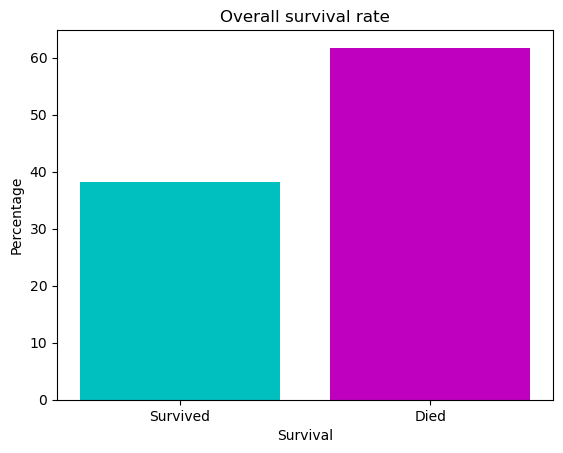

In [81]:
# 5 Plottings
# 5.1 Create a bar chart (plt.bar) to visualize the overall survival rate.

plt.bar(["Survived", "Died"], [survival_rate, 100-survival_rate], color=["c", "m"])
plt.title("Overall survival rate")
plt.xlabel("Survival")
plt.ylabel("Percentage")
plt.show()

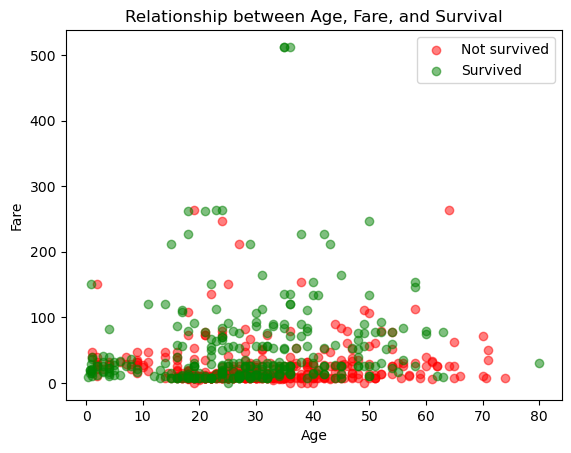

In [97]:
# Créer un nuage de points (plt.scatter) pour représenter la relation entre l'âge (Age) et le prix du billet (Fare) en fonction de la survie.
plt.scatter(
  titanic[titanic.survived == 0].age, 
  titanic[titanic.survived == 0].fare,
  color="red", label="Not survived", alpha=0.5
)
plt.scatter(
  titanic[titanic.survived == 1].age, 
  titanic[titanic.survived == 1].fare,
  color="green", label="Survived", alpha=0.5
)

plt.title('Relationship between Age, Fare, and Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

plt.show()

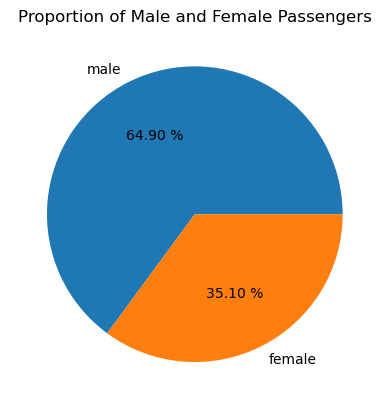

In [117]:
# Produire un diagramme circulaire (Pie chart) pour montrer la proportion de passagers masculins et féminins. Exemple de diagramme circulaire
plt.pie(gender_proportion.values, labels=gender_proportion.index, autopct='%.2f %%')
# Adding title
plt.title('Proportion of Male and Female Passengers')

plt.show()

In [60]:
# 6 Bonus for the datascients experts ;P